# Improve convergence of nmf.fit()

Check if the current convergence criterion, which checks the *average* improvement in log-likelihood per observation, prevents certain samples in higher order NMF models from converging.

## Setup

In [1]:
import os
while not os.path.exists('test_data'):
    os.chdir('..')
os.getcwd()

'/Users/yl3/github/genomics/nmflib'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats

import nmflib.nmf

In [3]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [4]:
sns.set()

## Generate synthetic data

In [5]:
def load_syn_data(r):  # r in PCAWG-7 data seems to be around 70
    datadir = 'test_data'
    W = pd.read_csv(datadir + '/ground.truth.syn.sigs.csv.gz',
                    index_col=[0, 1],
                    header=0)
    H = pd.read_csv(datadir +
                    '/ground.truth.syn.exposures.csv.gz',
                    index_col=0,
                    header=0)
    
    # Compute S, O and X_exp.
    WH = W.dot(H)
    O = scipy.stats.uniform.rvs(0, 20, WH.shape)
    S = scipy.stats.uniform.rvs(0.05, 1 - 0.05, WH.shape)
    
    # Simulate random counts.
    p = nmflib.nmf._nb_p((WH + O) * S, r)
    X_obs = scipy.stats.nbinom.rvs(r, p)
    return X_obs, W, H, S, O, r

In [6]:
np.random.seed(0)
X_obs, W_true, H_true, S_true, O_true, r_true = load_syn_data(r=70)
X_obs = pd.DataFrame(X_obs, index=W_true.index, columns=H_true.columns)

## Fit rank 21 model with default (element-wise) tolerance and absolute tolerance.

In [7]:
%%time

W, H, r, n_iter, errors = nmflib.nmf.fit(X_obs, W_true.shape[1], S_true,
                                         O_true, True, max_iter=2000)

CPU times: user 46.4 s, sys: 3.46 s, total: 49.8 s
Wall time: 30.6 s


In [8]:
%%time

W_conv, H_conv, r_conv, n_iter_conv, errors_conv = \
    nmflib.nmf.fit(X_obs, W_true.shape[1], S_true, O_true, True,
                   max_iter=20000, abstol=1e-4 / np.prod(X_obs.shape),
                   verbose=True)

INFO:root:Updated r to 2.8367043260490448
INFO:root:Updated r to 3.0114920231103897
INFO:root:Updated r to 3.299484687074476
INFO:root:Updated r to 4.432437044441415
INFO:root:Iteration 10 after 2.879 seconds, error: -147566773.22970447
INFO:root:Updated r to 8.812829462579487
INFO:root:Updated r to 16.2301270494349
INFO:root:Iteration 20 after 4.080 seconds, error: -147662931.63438028
INFO:root:Updated r to 25.244600208633113
INFO:root:Iteration 30 after 4.719 seconds, error: -147693086.7150172
INFO:root:Iteration 40 after 4.883 seconds, error: -147706999.69899124
INFO:root:Updated r to 34.832003106187045
INFO:root:Iteration 50 after 5.450 seconds, error: -147719038.53637108
INFO:root:Iteration 60 after 5.634 seconds, error: -147726878.0503819
INFO:root:Iteration 70 after 5.794 seconds, error: -147732021.65603283
INFO:root:Updated r to 46.72446924323243
INFO:root:Iteration 80 after 6.328 seconds, error: -147738058.10469612
INFO:root:Iteration 90 after 6.500 seconds, error: -147741316.

INFO:root:Iteration 1060 after 24.924 seconds, error: -147771050.37791318
INFO:root:Iteration 1070 after 25.081 seconds, error: -147771113.0561747
INFO:root:Iteration 1080 after 25.242 seconds, error: -147771179.427136
INFO:root:Iteration 1090 after 25.395 seconds, error: -147771249.65145716
INFO:root:Iteration 1100 after 25.559 seconds, error: -147771323.55624175
INFO:root:Iteration 1110 after 25.721 seconds, error: -147771400.93945298
INFO:root:Iteration 1120 after 25.874 seconds, error: -147771481.53422892
INFO:root:Iteration 1130 after 26.034 seconds, error: -147771564.8124146
INFO:root:Iteration 1140 after 26.205 seconds, error: -147771649.9550139
INFO:root:Iteration 1150 after 26.361 seconds, error: -147771735.9849412
INFO:root:Iteration 1160 after 26.517 seconds, error: -147771821.96561196
INFO:root:Iteration 1170 after 26.691 seconds, error: -147771907.54657274
INFO:root:Iteration 1180 after 26.847 seconds, error: -147771994.73012453
INFO:root:Iteration 1190 after 27.010 second

INFO:root:Iteration 2170 after 43.761 seconds, error: -147775404.6437631
INFO:root:Iteration 2180 after 43.934 seconds, error: -147775411.3645203
INFO:root:Iteration 2190 after 44.094 seconds, error: -147775417.8392704
INFO:root:Iteration 2200 after 44.249 seconds, error: -147775424.06942478
INFO:root:Iteration 2210 after 44.406 seconds, error: -147775430.1951092
INFO:root:Iteration 2220 after 44.563 seconds, error: -147775436.33210927
INFO:root:Iteration 2230 after 44.715 seconds, error: -147775442.52244252
INFO:root:Iteration 2240 after 44.889 seconds, error: -147775448.7402089
INFO:root:Iteration 2250 after 45.044 seconds, error: -147775454.93218327
INFO:root:Iteration 2260 after 45.208 seconds, error: -147775461.10566005
INFO:root:Iteration 2270 after 45.359 seconds, error: -147775467.42337865
INFO:root:Iteration 2280 after 45.519 seconds, error: -147775474.28473043
INFO:root:Iteration 2290 after 45.672 seconds, error: -147775481.8037336
INFO:root:Iteration 2300 after 45.843 second

INFO:root:Iteration 3280 after 62.201 seconds, error: -147775829.76311743
INFO:root:Iteration 3290 after 62.351 seconds, error: -147775831.88557607
INFO:root:Iteration 3300 after 62.511 seconds, error: -147775834.10373452
INFO:root:Iteration 3310 after 62.664 seconds, error: -147775836.4461307
INFO:root:Iteration 3320 after 62.832 seconds, error: -147775838.9226376
INFO:root:Iteration 3330 after 63.016 seconds, error: -147775841.51558366
INFO:root:Iteration 3340 after 63.196 seconds, error: -147775844.2475139
INFO:root:Iteration 3350 after 63.352 seconds, error: -147775847.42874783
INFO:root:Iteration 3360 after 63.538 seconds, error: -147775851.85770702
INFO:root:Iteration 3370 after 63.741 seconds, error: -147775857.31318867
INFO:root:Iteration 3380 after 63.909 seconds, error: -147775861.7392361
INFO:root:Iteration 3390 after 64.074 seconds, error: -147775865.0076172
INFO:root:Iteration 3400 after 64.237 seconds, error: -147775867.82739818
INFO:root:Iteration 3410 after 64.392 secon

INFO:root:Iteration 4400 after 80.560 seconds, error: -147776032.3108145
INFO:root:Iteration 4410 after 80.710 seconds, error: -147776033.4113653
INFO:root:Iteration 4420 after 80.870 seconds, error: -147776034.4903032
INFO:root:Updated r to 120.65220498953146
INFO:root:Iteration 4430 after 81.209 seconds, error: -147776035.90404037
INFO:root:Iteration 4440 after 81.371 seconds, error: -147776036.95313972
INFO:root:Iteration 4450 after 81.544 seconds, error: -147776037.98701796
INFO:root:Iteration 4460 after 81.703 seconds, error: -147776039.00744826
INFO:root:Iteration 4470 after 81.857 seconds, error: -147776040.01593983
INFO:root:Iteration 4480 after 82.023 seconds, error: -147776041.014293
INFO:root:Iteration 4490 after 82.237 seconds, error: -147776042.00459728
INFO:root:Iteration 4500 after 82.396 seconds, error: -147776042.98923793
INFO:root:Iteration 4510 after 82.554 seconds, error: -147776043.97098044
INFO:root:Iteration 4520 after 82.715 seconds, error: -147776044.95299366
I

INFO:root:Iteration 5510 after 99.967 seconds, error: -147776138.94481605
INFO:root:Iteration 5520 after 100.126 seconds, error: -147776139.82236123
INFO:root:Iteration 5530 after 100.281 seconds, error: -147776140.701129
INFO:root:Iteration 5540 after 100.451 seconds, error: -147776141.57997584
INFO:root:Iteration 5550 after 100.609 seconds, error: -147776142.45705438
INFO:root:Iteration 5560 after 100.769 seconds, error: -147776143.3307177
INFO:root:Iteration 5570 after 100.932 seconds, error: -147776144.20020503
INFO:root:Iteration 5580 after 101.088 seconds, error: -147776145.06584063
INFO:root:Iteration 5590 after 101.260 seconds, error: -147776145.9286505
INFO:root:Iteration 5600 after 101.427 seconds, error: -147776146.78963262
INFO:root:Iteration 5610 after 101.586 seconds, error: -147776147.6491008
INFO:root:Iteration 5620 after 101.745 seconds, error: -147776148.50629234
INFO:root:Iteration 5630 after 101.899 seconds, error: -147776149.35929087
INFO:root:Iteration 5640 after 

INFO:root:Iteration 6610 after 118.548 seconds, error: -147776235.26300904
INFO:root:Iteration 6620 after 118.739 seconds, error: -147776236.6335062
INFO:root:Iteration 6630 after 118.943 seconds, error: -147776238.0014578
INFO:root:Updated r to 120.8677125073592
INFO:root:Iteration 6640 after 119.311 seconds, error: -147776239.40250823
INFO:root:Iteration 6650 after 119.476 seconds, error: -147776240.7779784
INFO:root:Iteration 6660 after 119.635 seconds, error: -147776242.16015083
INFO:root:Iteration 6670 after 119.794 seconds, error: -147776243.55042762
INFO:root:Iteration 6680 after 119.970 seconds, error: -147776244.94974425
INFO:root:Iteration 6690 after 120.132 seconds, error: -147776246.35906267
INFO:root:Iteration 6700 after 120.293 seconds, error: -147776247.77944252
INFO:root:Iteration 6710 after 120.454 seconds, error: -147776249.21195716
INFO:root:Iteration 6720 after 120.611 seconds, error: -147776250.65752876
INFO:root:Iteration 6730 after 120.776 seconds, error: -147776

INFO:root:Iteration 7710 after 138.058 seconds, error: -147776456.33856964
INFO:root:Iteration 7720 after 138.239 seconds, error: -147776459.22718987
INFO:root:Iteration 7730 after 138.406 seconds, error: -147776462.171262
INFO:root:Iteration 7740 after 138.569 seconds, error: -147776465.17664254
INFO:root:Iteration 7750 after 138.757 seconds, error: -147776468.22481552
INFO:root:Iteration 7760 after 138.942 seconds, error: -147776471.27936307
INFO:root:Iteration 7770 after 139.118 seconds, error: -147776474.3107257
INFO:root:Iteration 7780 after 139.294 seconds, error: -147776477.31077594
INFO:root:Iteration 7790 after 139.487 seconds, error: -147776480.2838307
INFO:root:Iteration 7800 after 139.677 seconds, error: -147776483.23391554
INFO:root:Iteration 7810 after 139.836 seconds, error: -147776486.1622397
INFO:root:Iteration 7820 after 140.011 seconds, error: -147776489.0707793
INFO:root:Iteration 7830 after 140.182 seconds, error: -147776491.96514526
INFO:root:Iteration 7840 after 

INFO:root:Iteration 8810 after 156.966 seconds, error: -147776776.52596104
INFO:root:Iteration 8820 after 157.129 seconds, error: -147776780.8509658
INFO:root:Iteration 8830 after 157.291 seconds, error: -147776785.375584
INFO:root:Iteration 8840 after 157.456 seconds, error: -147776790.09945694
INFO:root:Iteration 8850 after 157.615 seconds, error: -147776795.00987735
INFO:root:Iteration 8860 after 157.785 seconds, error: -147776800.08222154
INFO:root:Iteration 8870 after 157.950 seconds, error: -147776805.2820703
INFO:root:Iteration 8880 after 158.113 seconds, error: -147776810.5688734
INFO:root:Iteration 8890 after 158.288 seconds, error: -147776815.9007003
INFO:root:Iteration 8900 after 158.466 seconds, error: -147776821.23921135
INFO:root:Iteration 8910 after 158.662 seconds, error: -147776826.5536895
INFO:root:Iteration 8920 after 158.861 seconds, error: -147776831.82288852
INFO:root:Iteration 8930 after 159.027 seconds, error: -147776837.03361854
INFO:root:Iteration 8940 after 1

INFO:root:Iteration 9910 after 175.955 seconds, error: -147777226.1949175
INFO:root:Iteration 9920 after 176.123 seconds, error: -147777229.56258565
INFO:root:Iteration 9930 after 176.303 seconds, error: -147777231.97533265
INFO:root:Iteration 9940 after 176.487 seconds, error: -147777233.96326262
INFO:root:Iteration 9950 after 176.675 seconds, error: -147777235.74858773
INFO:root:Iteration 9960 after 176.861 seconds, error: -147777237.38191178
INFO:root:Updated r to 125.8602245726267
INFO:root:Iteration 9970 after 177.323 seconds, error: -147777254.45297658
INFO:root:Iteration 9980 after 177.493 seconds, error: -147777256.01852798
INFO:root:Iteration 9990 after 177.659 seconds, error: -147777257.41041157
INFO:root:Iteration 10000 after 177.821 seconds, error: -147777258.70682457
INFO:root:Iteration 10010 after 177.994 seconds, error: -147777259.9469328
INFO:root:Iteration 10020 after 178.166 seconds, error: -147777261.15457106
INFO:root:Iteration 10030 after 178.397 seconds, error: -1

INFO:root:Iteration 10990 after 195.381 seconds, error: -147777392.51655287
INFO:root:Iteration 11000 after 195.552 seconds, error: -147777393.0447077
INFO:root:Iteration 11010 after 195.712 seconds, error: -147777393.57372376
INFO:root:Iteration 11020 after 195.922 seconds, error: -147777394.10277438
INFO:root:Iteration 11030 after 196.128 seconds, error: -147777394.63032264
INFO:root:Iteration 11040 after 196.302 seconds, error: -147777395.1630761
INFO:root:Iteration 11050 after 196.475 seconds, error: -147777395.74029726
INFO:root:Iteration 11060 after 196.642 seconds, error: -147777396.48809484
INFO:root:Iteration 11070 after 196.807 seconds, error: -147777397.66446337
INFO:root:Iteration 11080 after 196.986 seconds, error: -147777399.35054612
INFO:root:Iteration 11090 after 197.171 seconds, error: -147777400.8686381
INFO:root:Iteration 11100 after 197.345 seconds, error: -147777401.75841027
INFO:root:Iteration 11110 after 197.522 seconds, error: -147777402.31322634
INFO:root:Itera

INFO:root:Iteration 12080 after 214.841 seconds, error: -147777530.4543278
INFO:root:Iteration 12090 after 215.019 seconds, error: -147777534.43009037
INFO:root:Iteration 12100 after 215.194 seconds, error: -147777538.3209622
INFO:root:Iteration 12110 after 215.371 seconds, error: -147777541.8971569
INFO:root:Iteration 12120 after 215.541 seconds, error: -147777545.03659615
INFO:root:Iteration 12130 after 215.766 seconds, error: -147777547.8235333
INFO:root:Iteration 12140 after 215.946 seconds, error: -147777550.3106374
INFO:root:Iteration 12150 after 216.133 seconds, error: -147777552.51615965
INFO:root:Iteration 12160 after 216.327 seconds, error: -147777554.45976895
INFO:root:Iteration 12170 after 216.509 seconds, error: -147777556.1718548
INFO:root:Iteration 12180 after 216.681 seconds, error: -147777557.6895568
INFO:root:Iteration 12190 after 216.849 seconds, error: -147777559.05017024
INFO:root:Iteration 12200 after 217.023 seconds, error: -147777560.2866347
INFO:root:Iteration 

INFO:root:Iteration 13170 after 234.364 seconds, error: -147777613.69213557
INFO:root:Iteration 13180 after 234.548 seconds, error: -147777613.9412813
INFO:root:Iteration 13190 after 234.716 seconds, error: -147777614.19081685
INFO:root:Iteration 13200 after 234.883 seconds, error: -147777614.44074956
INFO:root:Iteration 13210 after 235.059 seconds, error: -147777614.69132143
INFO:root:Iteration 13220 after 235.230 seconds, error: -147777614.94309607
INFO:root:Iteration 13230 after 235.400 seconds, error: -147777615.19693342
INFO:root:Iteration 13240 after 235.588 seconds, error: -147777615.45381948
INFO:root:Iteration 13250 after 235.756 seconds, error: -147777615.7145597
INFO:root:Iteration 13260 after 235.934 seconds, error: -147777615.97942227
INFO:root:Iteration 13270 after 236.107 seconds, error: -147777616.24796134
INFO:root:Iteration 13280 after 236.295 seconds, error: -147777616.51966313
INFO:root:Iteration 13290 after 236.469 seconds, error: -147777616.7995152
INFO:root:Itera

INFO:root:Iteration 14260 after 259.190 seconds, error: -147777653.41729254
INFO:root:Iteration 14270 after 259.368 seconds, error: -147777653.68241012
INFO:root:Iteration 14280 after 259.546 seconds, error: -147777653.9628676
INFO:root:Iteration 14290 after 259.724 seconds, error: -147777654.24861544
INFO:root:Iteration 14300 after 259.903 seconds, error: -147777654.52766022
INFO:root:Iteration 14310 after 260.085 seconds, error: -147777654.79331923
INFO:root:Iteration 14320 after 260.294 seconds, error: -147777655.04683727
INFO:root:Iteration 14330 after 260.474 seconds, error: -147777655.29395875
INFO:root:Iteration 14340 after 260.651 seconds, error: -147777655.5406862
INFO:root:Iteration 14350 after 260.831 seconds, error: -147777655.79214844
INFO:root:Iteration 14360 after 261.011 seconds, error: -147777656.0542101
INFO:root:Iteration 14370 after 261.196 seconds, error: -147777656.3355224
INFO:root:Iteration 14380 after 261.387 seconds, error: -147777656.64855707
INFO:root:Iterat

INFO:root:Iteration 15340 after 279.542 seconds, error: -147777686.68543914
INFO:root:Iteration 15350 after 279.721 seconds, error: -147777686.87943286
INFO:root:Iteration 15360 after 279.909 seconds, error: -147777687.07439426
INFO:root:Iteration 15370 after 280.089 seconds, error: -147777687.26908767
INFO:root:Iteration 15380 after 280.284 seconds, error: -147777687.46247718
INFO:root:Iteration 15390 after 280.463 seconds, error: -147777687.65390366
INFO:root:Iteration 15400 after 280.638 seconds, error: -147777687.84310037
INFO:root:Iteration 15410 after 280.824 seconds, error: -147777688.03008318
INFO:root:Iteration 15420 after 281.014 seconds, error: -147777688.2150075
INFO:root:Iteration 15430 after 281.236 seconds, error: -147777688.39806232
INFO:root:Iteration 15440 after 281.430 seconds, error: -147777688.57942477
INFO:root:Iteration 15450 after 281.607 seconds, error: -147777688.75925988
INFO:root:Iteration 15460 after 281.788 seconds, error: -147777688.9377402
INFO:root:Iter

INFO:root:Iteration 16430 after 300.135 seconds, error: -147777707.43734503
INFO:root:Iteration 16440 after 300.337 seconds, error: -147777707.66763633
INFO:root:Iteration 16450 after 300.525 seconds, error: -147777707.89998925
INFO:root:Iteration 16460 after 300.707 seconds, error: -147777708.14801365
INFO:root:Iteration 16470 after 300.890 seconds, error: -147777708.4321777
INFO:root:Iteration 16480 after 301.088 seconds, error: -147777708.77665076
INFO:root:Iteration 16490 after 301.270 seconds, error: -147777709.1958402
INFO:root:Iteration 16500 after 301.472 seconds, error: -147777709.67260525
INFO:root:Iteration 16510 after 301.655 seconds, error: -147777710.15509385
INFO:root:Iteration 16520 after 301.835 seconds, error: -147777710.5930192
INFO:root:Iteration 16530 after 302.023 seconds, error: -147777710.9708634
INFO:root:Iteration 16540 after 302.252 seconds, error: -147777711.29928777
INFO:root:Iteration 16550 after 302.448 seconds, error: -147777711.59336728
INFO:root:Iterat

INFO:root:Iteration 17520 after 321.173 seconds, error: -147777724.62841448
INFO:root:Iteration 17530 after 321.356 seconds, error: -147777724.7212543
INFO:root:Iteration 17540 after 321.560 seconds, error: -147777724.81046426
INFO:root:Iteration 17550 after 321.748 seconds, error: -147777724.89653483
INFO:root:Iteration 17560 after 321.937 seconds, error: -147777724.9799081
INFO:root:Iteration 17570 after 322.122 seconds, error: -147777725.06094226
INFO:root:Iteration 17580 after 322.328 seconds, error: -147777725.13990766
INFO:root:Iteration 17590 after 322.536 seconds, error: -147777725.21701255
INFO:root:Iteration 17600 after 322.725 seconds, error: -147777725.2924465
INFO:root:Iteration 17610 after 322.909 seconds, error: -147777725.36642027
INFO:root:Iteration 17620 after 323.107 seconds, error: -147777725.43918392
INFO:root:Iteration 17630 after 323.305 seconds, error: -147777725.5110191
INFO:root:Iteration 17640 after 323.517 seconds, error: -147777725.58221546
INFO:root:Iterat

INFO:root:Iteration 18610 after 344.880 seconds, error: -147777734.9814343
INFO:root:Iteration 18620 after 345.185 seconds, error: -147777735.03509822
INFO:root:Iteration 18630 after 345.472 seconds, error: -147777735.08826226
INFO:root:Iteration 18640 after 345.715 seconds, error: -147777735.14108908
INFO:root:Iteration 18650 after 346.004 seconds, error: -147777735.19371623
INFO:root:Iteration 18660 after 346.366 seconds, error: -147777735.2462785
INFO:root:Iteration 18670 after 346.571 seconds, error: -147777735.29892343
INFO:root:Iteration 18680 after 346.776 seconds, error: -147777735.3518224
INFO:root:Iteration 18690 after 346.983 seconds, error: -147777735.40518025
INFO:root:Iteration 18700 after 347.191 seconds, error: -147777735.45924425
INFO:root:Iteration 18710 after 347.401 seconds, error: -147777735.51431355
INFO:root:Iteration 18720 after 347.605 seconds, error: -147777735.57074815
INFO:root:Iteration 18730 after 347.808 seconds, error: -147777735.6289786
INFO:root:Iterat

INFO:root:Iteration 19700 after 369.566 seconds, error: -147777742.3703944
INFO:root:Iteration 19710 after 369.791 seconds, error: -147777742.44028565
INFO:root:Iteration 19720 after 370.000 seconds, error: -147777742.50483
INFO:root:Iteration 19730 after 370.221 seconds, error: -147777742.56490847
INFO:root:Iteration 19740 after 370.432 seconds, error: -147777742.62188616
INFO:root:Iteration 19750 after 370.641 seconds, error: -147777742.67680308
INFO:root:Iteration 19760 after 370.860 seconds, error: -147777742.73027554
INFO:root:Iteration 19770 after 371.069 seconds, error: -147777742.7826449
INFO:root:Iteration 19780 after 371.279 seconds, error: -147777742.83411294
INFO:root:Iteration 19790 after 371.487 seconds, error: -147777742.88481784
INFO:root:Iteration 19800 after 371.707 seconds, error: -147777742.93486905
INFO:root:Iteration 19810 after 371.934 seconds, error: -147777742.98436096
INFO:root:Iteration 19820 after 372.159 seconds, error: -147777743.03337592
INFO:root:Iterati

CPU times: user 10min 59s, sys: 51.2 s, total: 11min 50s
Wall time: 6min 16s


In [9]:
print(f"Error with original convergence tolerance: {errors[-1]}")
print(f"Error with absolute convergence tolerance: {errors_conv[-1]}")
print("Difference: {}".format(errors_conv[-1] - errors[-1]))

Error with original convergence tolerance: -147773016.9310616
Error with absolute convergence tolerance: -147777743.85653907
Difference: -4726.925477474928


**With the original convergence criterion, the model is far from converged!**

## Compare per-sample fit between the old and new convergence criteria

In [60]:
old_logliks = nmflib.nmf.loglik(X_obs, r=r, W=W, H=H, S=S_true, O=O_true)
old_sig_logliks = np.sum(old_logliks, 1)
old_sample_logliks = np.sum(old_logliks, 0)
old_sample_logliks.shape

(2700,)

In [61]:
new_logliks = nmflib.nmf.loglik(X_obs, r=r_conv, W=W_conv, H=H_conv, S=S_true,
                                O=O_true)
new_sig_logliks = np.sum(new_logliks, 1)
new_sample_logliks = np.sum(new_logliks, 0)
new_sample_logliks.shape

(2700,)

[]

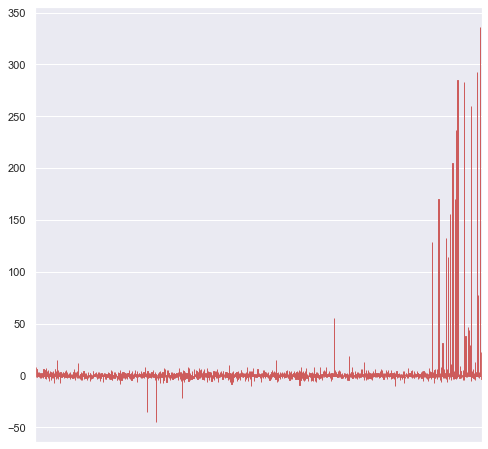

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(np.arange(len(new_sample_logliks)),
            (new_sample_logliks - old_sample_logliks),
            color='indianred',
            edgecolor='indianred')
ax.set_xticks([])

**As expected, a very small number of samples are getting better fitted with the added iterations!**

In [13]:
loglik_diff = new_sample_logliks - old_sample_logliks
loglik_diff[np.flip(np.argsort(loglik_diff))]

array([336.42299144, 292.92062756, 285.07868863, ..., -21.73884989,
       -35.44364681, -44.839899  ])

## Plot heatmap of loglik improvements

In [28]:
%matplotlib notebook

<IPython.core.display.Javascript object>


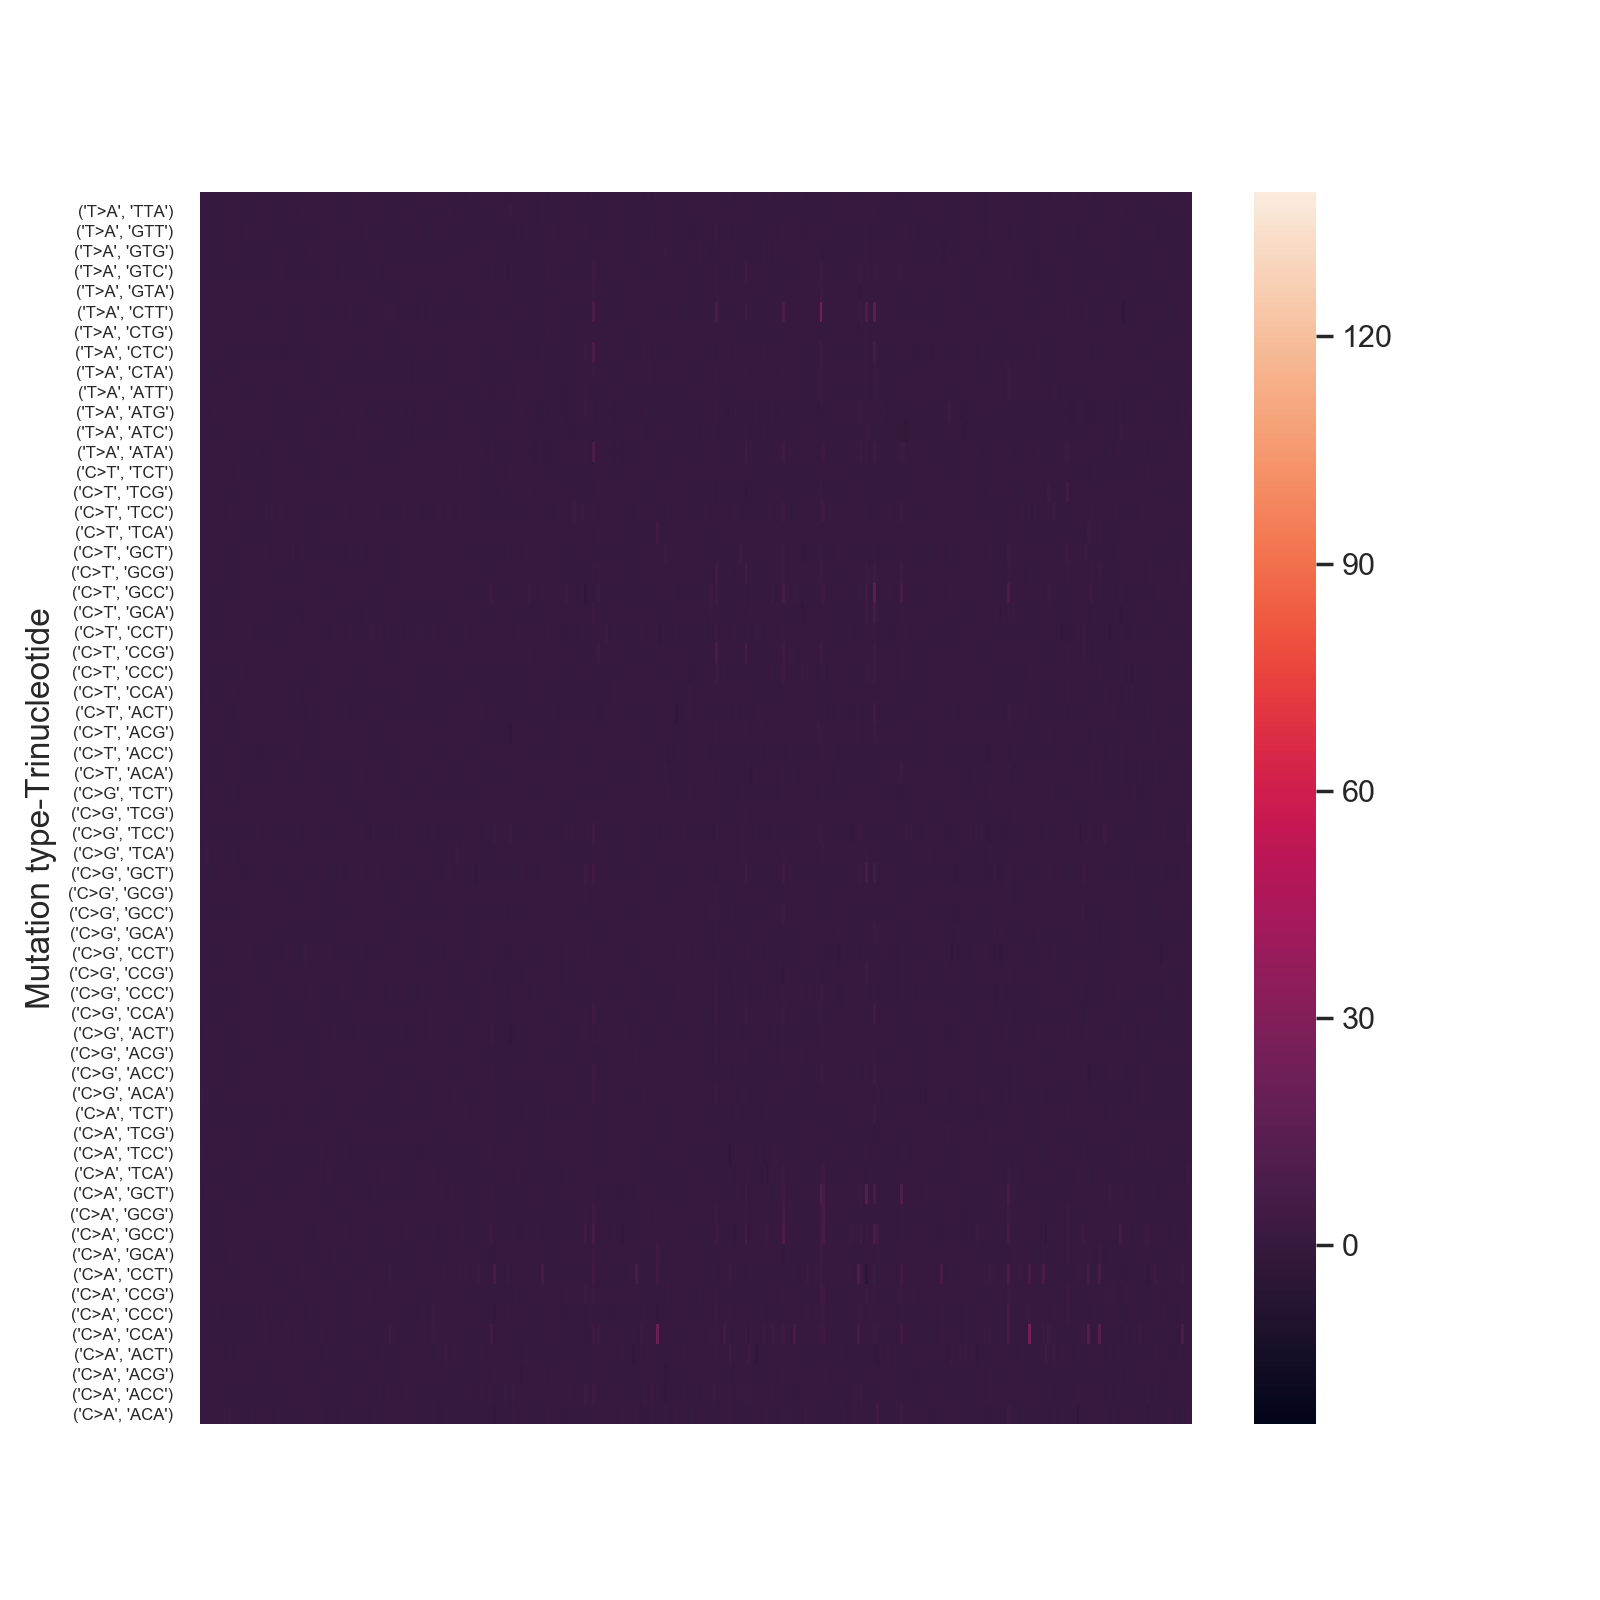

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(pd.DataFrame(new_logliks - old_logliks, index=W_true.index),
            xticklabels=False, )
_ = ax.set_yticks(0.5 + np.arange(96))
_ = ax.set_yticklabels(W_true.index, rotation=0, fontdict={'fontsize': 6})

**It can be seen that indeed specific subset of X rows and columns are contributing most to the log-likelihood improvement. Thus, this block of coordinates should have been iterated the most.**

### Distributions of log-likelihood gains by sample

<IPython.core.display.Javascript object>


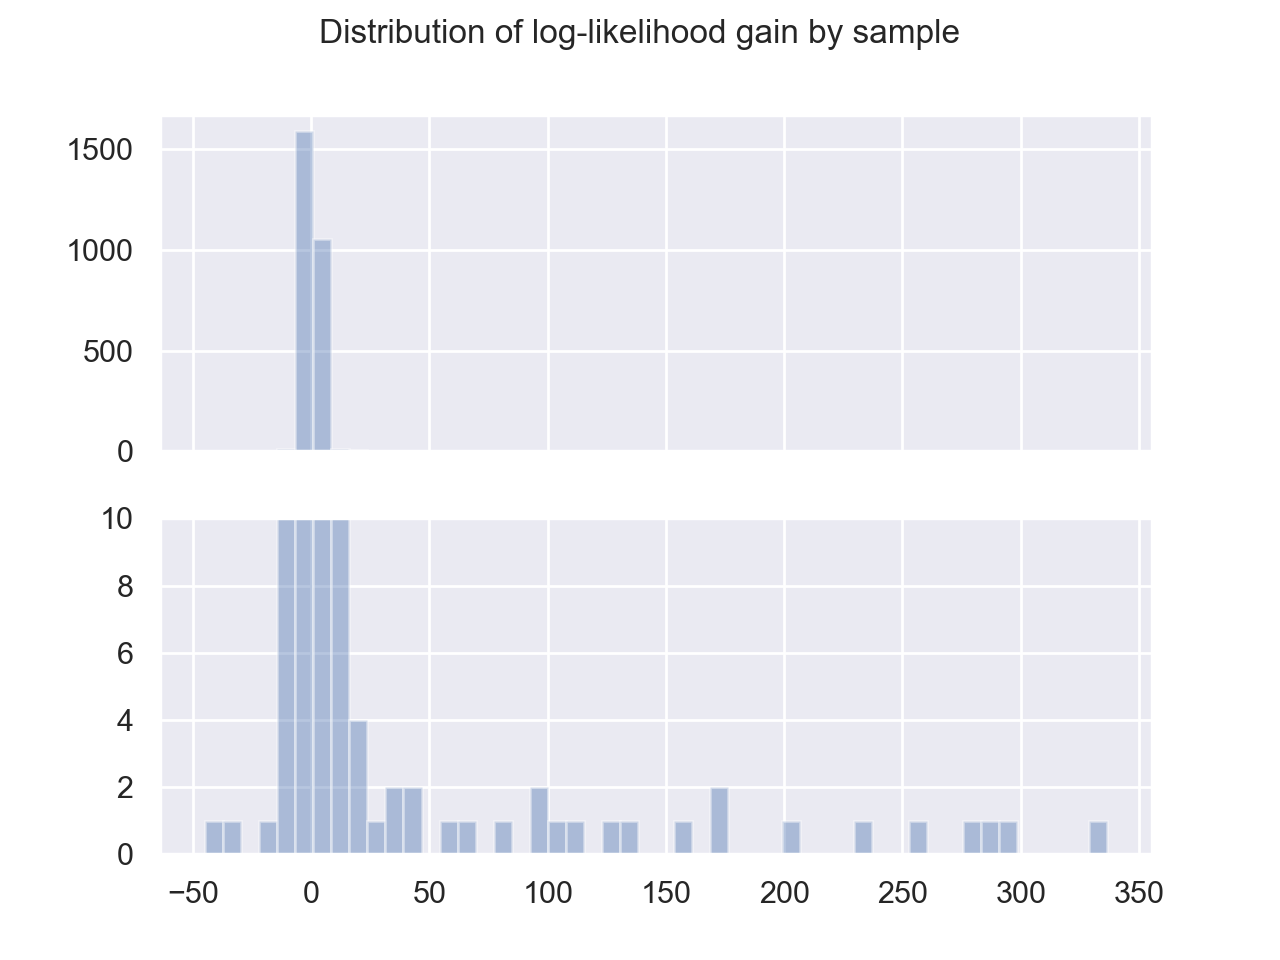

(0, 10)

In [51]:
fig, ax = plt.subplots(2, 1, sharex=True)
fig.suptitle('Distribution of log-likelihood gain by sample')
sns.distplot(new_sample_logliks - old_sample_logliks, kde=False, ax=ax[0])
sns.distplot(new_sample_logliks - old_sample_logliks, kde=False, ax=ax[1])
ax[1].set_ylim(0, 10)

#### Z-score

<IPython.core.display.Javascript object>


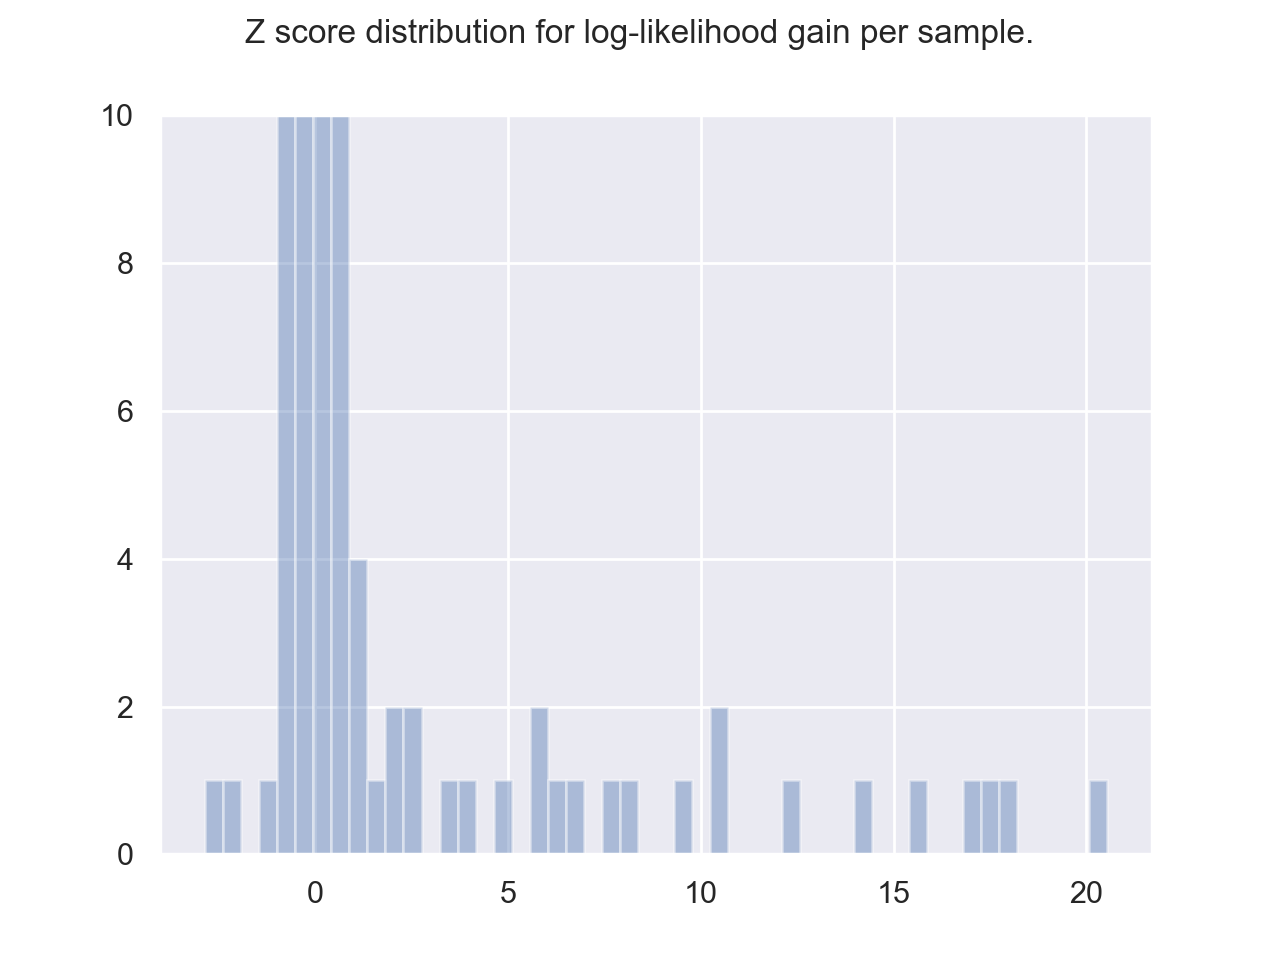

(0, 10)

In [63]:
fig, ax = plt.subplots()
fig.suptitle("Z score distribution for log-likelihood gain per sample.")
sns.distplot(scipy.stats.zscore(new_sample_logliks - old_sample_logliks),
             kde=False)
ax.set_ylim(0, 10)

<IPython.core.display.Javascript object>


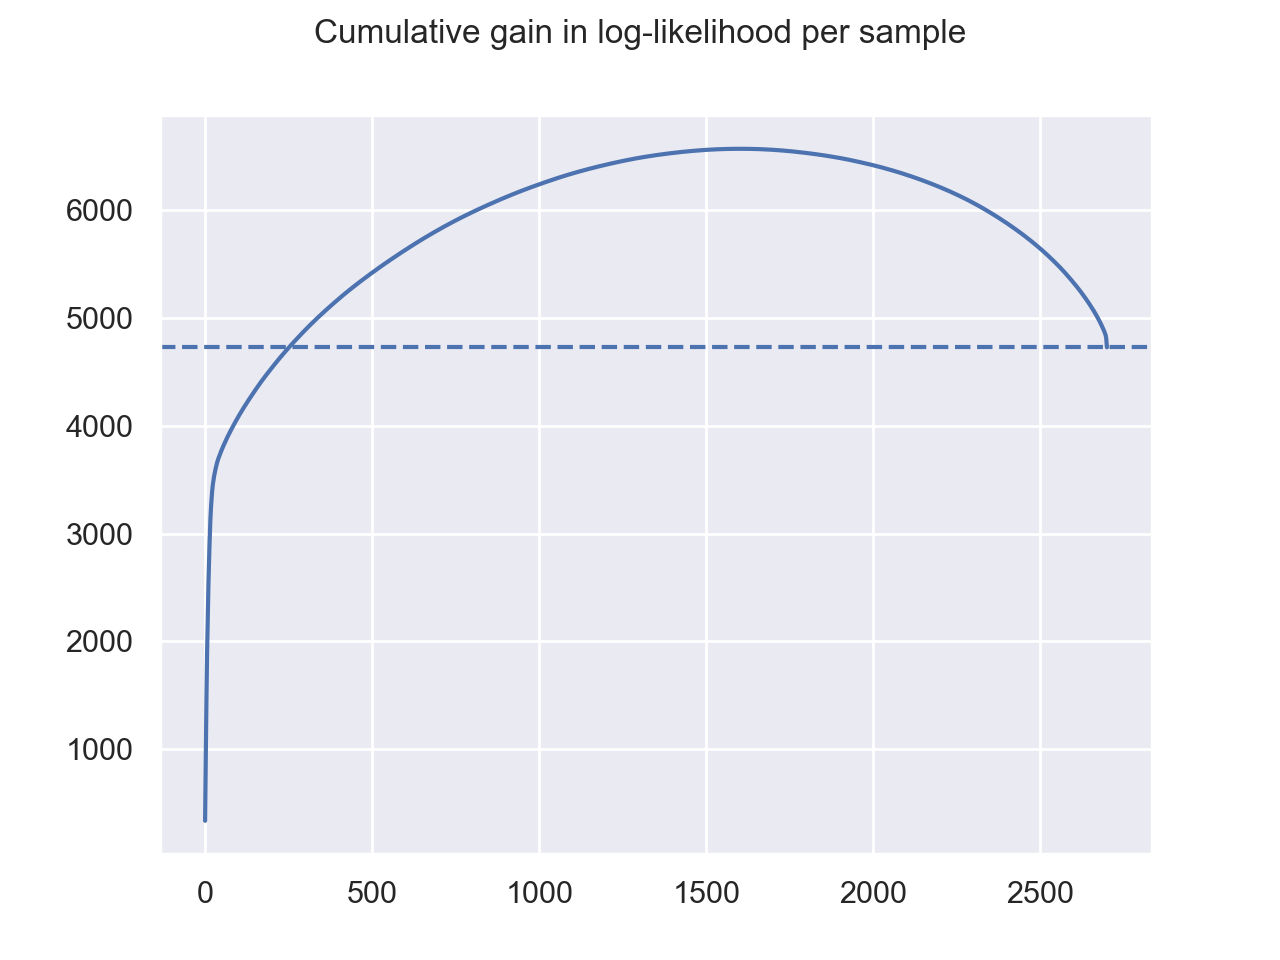

In [71]:
fig, ax = plt.subplots()
fig.suptitle('Cumulative gain in log-likelihood per sample')
sns.lineplot(
    np.arange(len(new_sample_logliks)),
    np.cumsum(np.flip(np.sort(new_sample_logliks - old_sample_logliks)))
)
ax.axhline(np.sum(np.flip(np.sort(new_sample_logliks - old_sample_logliks))),
           ls='--')

**About 75 of the log-likelihood could have been gained with the handful of outlier samples.**

### Distribution of log-likelihood gain by signature

<IPython.core.display.Javascript object>


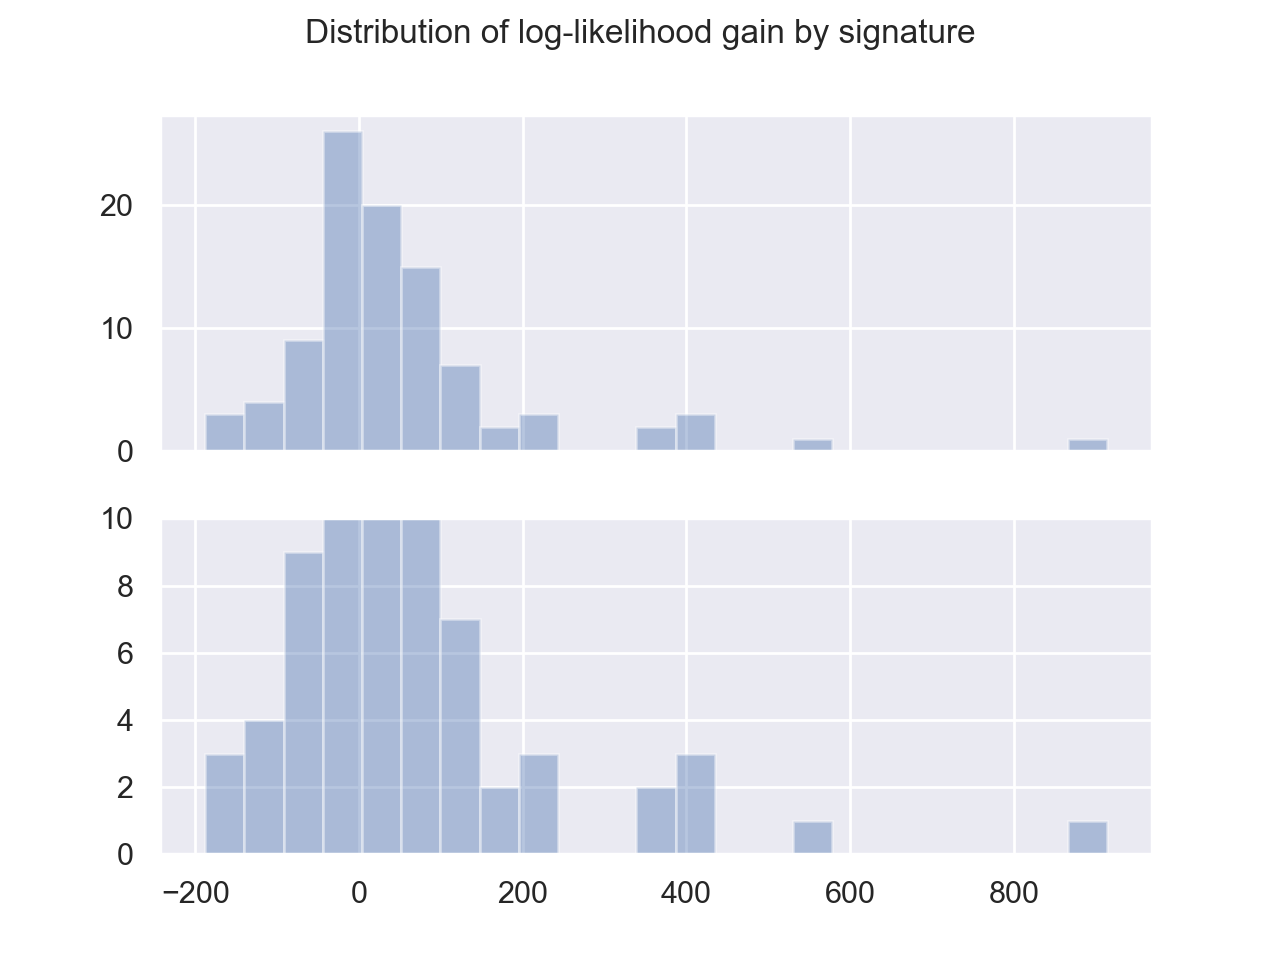

(0, 10)

In [62]:
fig, ax = plt.subplots(2, 1, sharex=True)
fig.suptitle('Distribution of log-likelihood gain by signature')
sns.distplot(new_sig_logliks - old_sig_logliks, kde=False, ax=ax[0])
sns.distplot(new_sig_logliks - old_sig_logliks, kde=False, ax=ax[1])
ax[1].set_ylim(0, 10)

#### Z-score

<IPython.core.display.Javascript object>


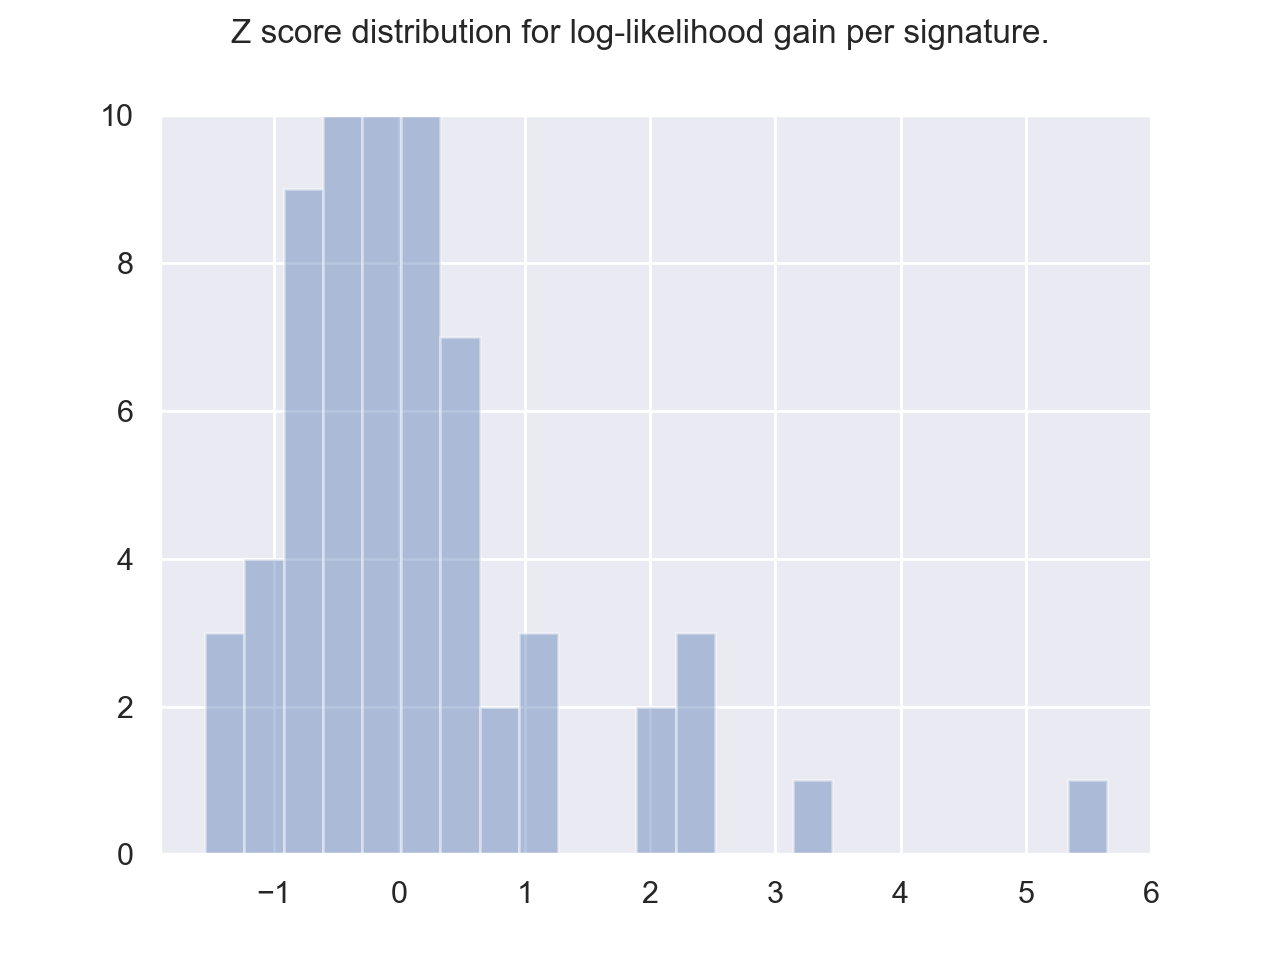

(0, 10)

In [64]:
fig, ax = plt.subplots()
fig.suptitle("Z score distribution for log-likelihood gain per signature.")
sns.distplot(scipy.stats.zscore(new_sig_logliks - old_sig_logliks),
             kde=False)
ax.set_ylim(0, 10)

<IPython.core.display.Javascript object>


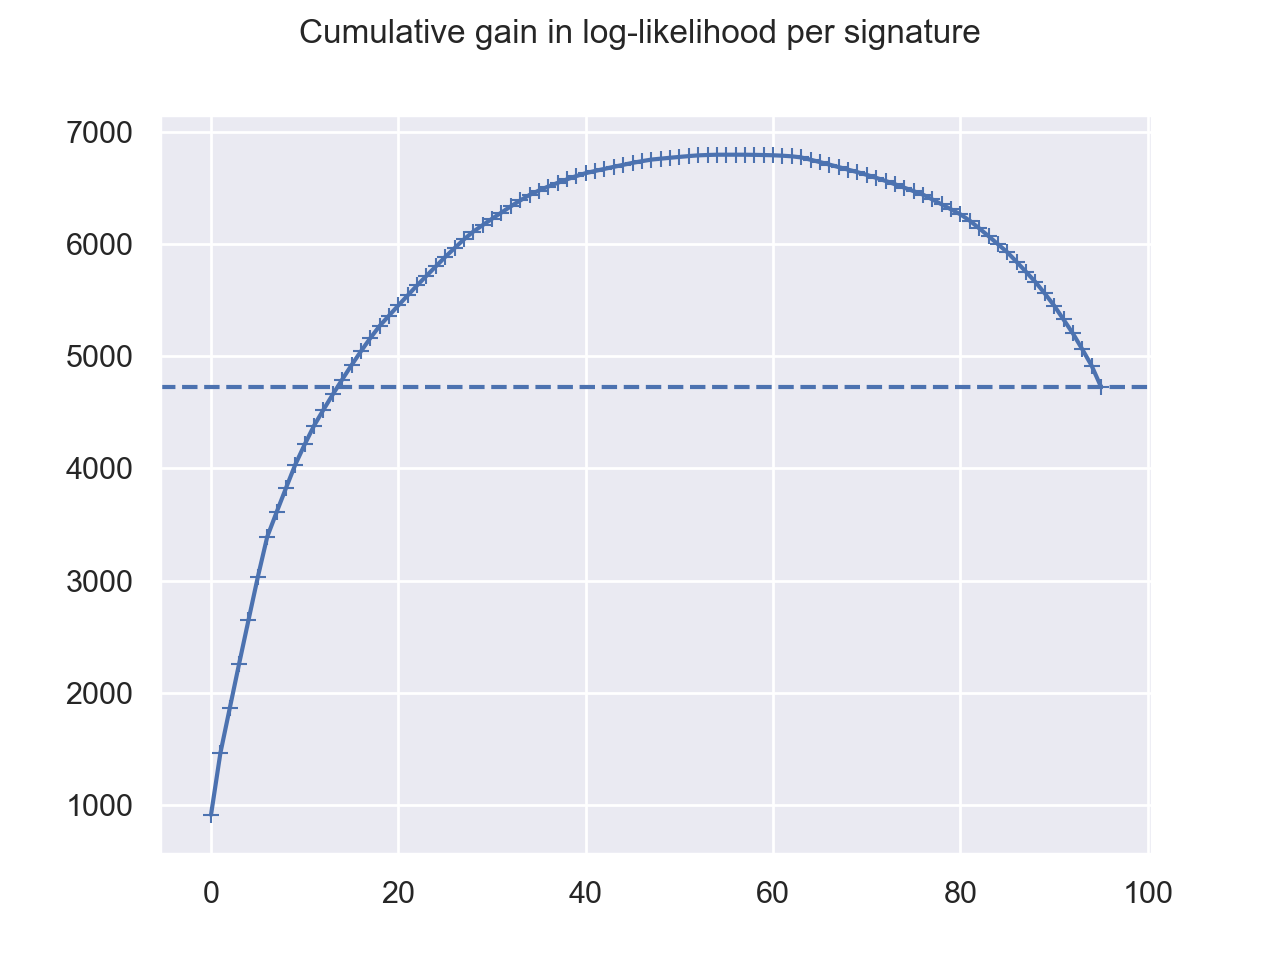

In [88]:
fig, ax = plt.subplots()
fig.suptitle('Cumulative gain in log-likelihood per signature')
x = np.arange(len(new_sig_logliks))
y = np.cumsum(np.flip(np.sort(new_sig_logliks - old_sig_logliks)))
sns.lineplot(x, y)
sns.scatterplot(x, y, marker='+')
ax.axhline(y[-1], ls='--')

**The top five mutation types contribute in total to about 50% of the log-likelihood gain.**

## Z-score for each element

<IPython.core.display.Javascript object>


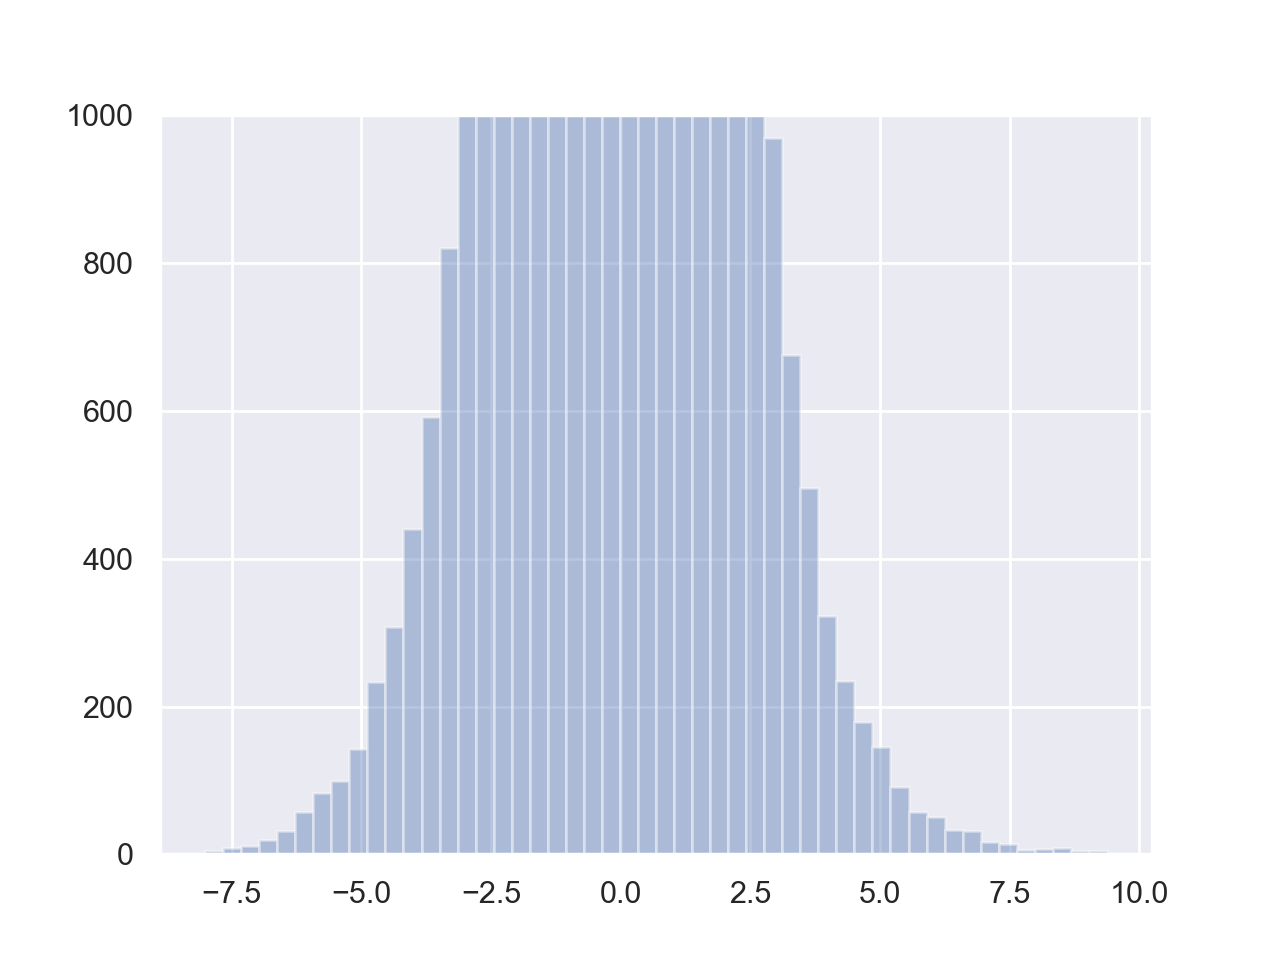

(0, 1000)

In [92]:
fig, ax = plt.subplots()
sns.distplot(scipy.stats.zscore(new_logliks - old_logliks).reshape(-1),kde=False)
ax.set_ylim(0, 1000)

### How many columns or rows would be selected for a per-element Z-score cutoff of 2?

In [96]:
zscores = pd.DataFrame(scipy.stats.zscore(new_logliks - old_logliks))

In [100]:
cutoff = 2
display((zscores > cutoff).any(0).value_counts())
display((zscores > cutoff).any(1).value_counts())

True     2624
False      76
dtype: int64

True    96
dtype: int64